## Student Performance Indicator

#### Life cycle of Machine learning Project
* Understanding the problem statement
* Data Collection 
* Data Checks to perform
* Exploratory data analysis
* Data Pre-Processing
* Model Training
* Choose the best model

### 1) Problem statement
* This project understands how students' performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch, and Test preparation courses 

### 2) Data Collection 
* Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
* The dat consists of 8 columns and 1000 rows

### 2.1 Import Data and Required Packages
#### Import Pandas, Numpy, Matplotlib, Seaborn, and Warnings Library

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas Dataframe

In [2]:
df = pd.read_csv("C:/Users/uyen/Desktop/mlproject/notebook/data/stud.csv")

#### Show Top 5 Records

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of the dataset

In [4]:
df.shape

(1000, 8)

### 2.2 Dataset information

* gender: sex of student (string, binary) -> (male/female)
* race/ethnicity: ethnicity of student (string, nominal) -> (Group A, B, C, D, E)
* parental level of education: parents' final education (string, ordinal) -> (some high school, high school, some college, associate degree, bachelor's degree, master's degree)\
* lunch: having lunch before test (string, binary) -> (standard, free/reduced)
* test preparation course: complete or not complete before test (string, binary) -> (completed/none)
* math score: student's math score (integer)
* reading score: student's reading score (integer)
* writing score: student's writing score (integer)

### 3. Data checks to perform

* check missing values
* check duplicates
* check data type
* check the number of unique values of each column
* check statistics of data set
* check various categories present in the different categorical column

### 3.1 Check missing values

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

**There are no missing values in the data set**

### 3.2 Check duplicates

In [6]:
df.duplicated().sum()

0

**There are no duplicate values in the data set**

### 3.3 Check data types 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each column

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check statistics of data set

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Insight**
* From the above numerical description data, all means are very close to each other - between 66.00 and 68.05
* All standard deviations are also close - between 14.60 and 15.19
* Math has the lowest minimum score of 0, writing has a minimum score of 10, and reading has a minimum score of 17

### 3.6 Exploring Data

In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
print("Categories in 'gender' variable:", end = " ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:", end = " ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental level of education' variable:", end = " ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:", end = " ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:", end = " ")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable: ['female' 'male']
Categories in 'race_ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable: ['standard' 'free/reduced']
Categories in 'test preparation course' variable: ['none' 'completed']


In [12]:
#define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

#print columns
print('We have {} numerical features: {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features: {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### 3.7 Adding columns for 'Total Score' and 'Average'

In [13]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score'] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f"Number of students with full marks in Maths: {math_full}")
print(f"Number of students with full marks in Writing: {writing_full}")
print(f"Number of students with full marks in Reading: {reading_full}")

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [15]:
reading_less_20  = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f"Number of students with less than 20 marks in Maths: {math_less_20}")
print(f"Number of students with less than 20 marks in Writing: {writing_less_20}")
print(f"Number of students with less than 20 marks in Reading: { reading_less_20}")

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


**Insights**
* From the above values, students performed the worst in Maths
* Best performance is in reading section

### 4. Exploring Data (Visualization)

#### 4.1 Visualize average score distributions

* Histogram
* Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

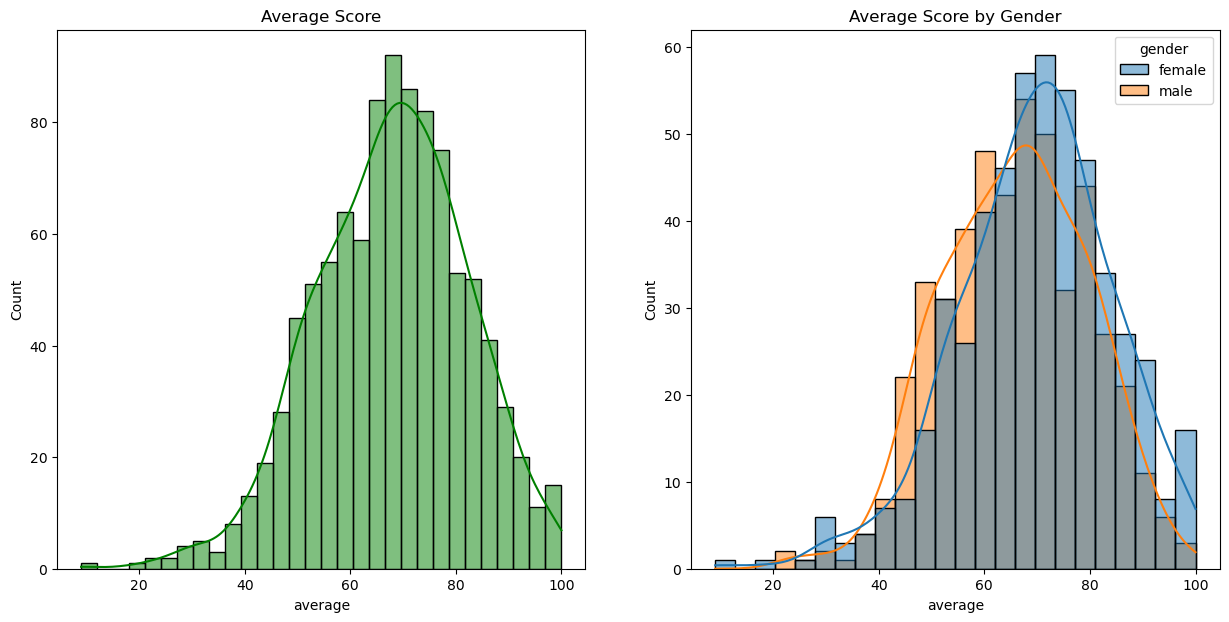

In [16]:
#overall average score and average score based on gender
fig, axs = plt.subplots(1, 2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df, x = 'average', bins =30, kde = True, color = 'g')
plt.title('Average Score')
plt.subplot(122)
sns.histplot(data = df, x = 'average', kde = True, hue = 'gender')
plt.title('Average Score by Gender')
plt.show()

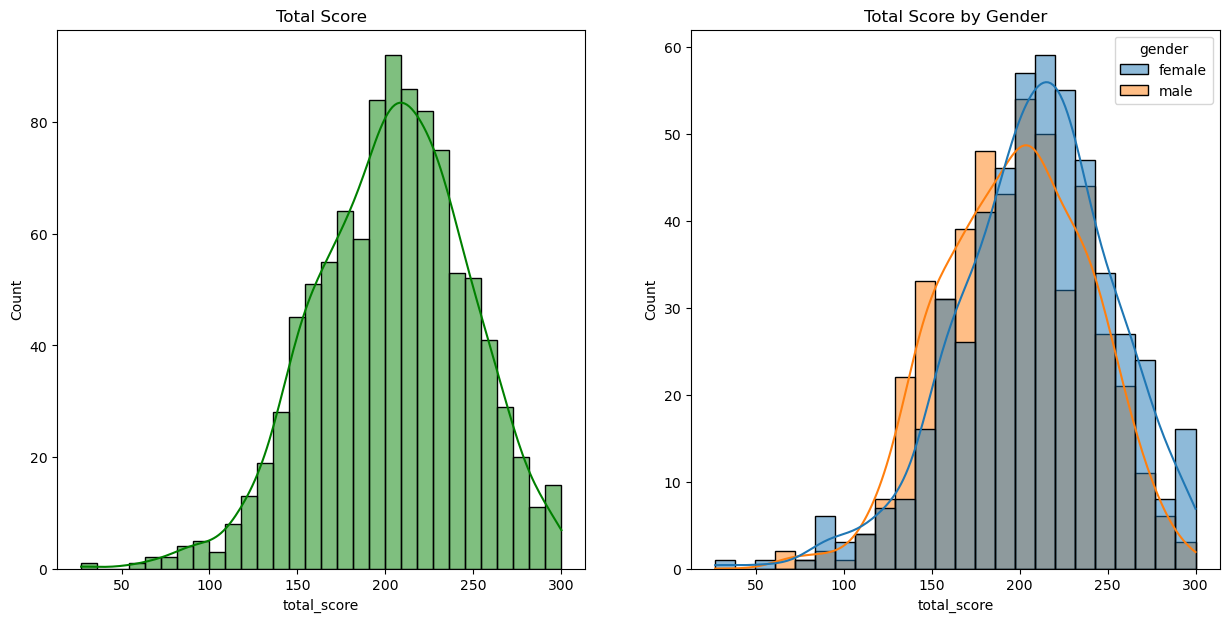

In [17]:
#overall total score and total score based on gender
fig, axs = plt.subplots(1, 2, figsize = (15,7))
plt.subplot(1,2,1)
sns.histplot(data = df, x = 'total_score', bins = 30, kde = True, color= 'g')
plt.title("Total Score")
plt.subplot(1,2,2)
sns.histplot(data= df, x = 'total_score', kde = True, hue = 'gender')
plt.title("Total Score by Gender")
plt.show()

**Insights**
* Female students performed better than male students

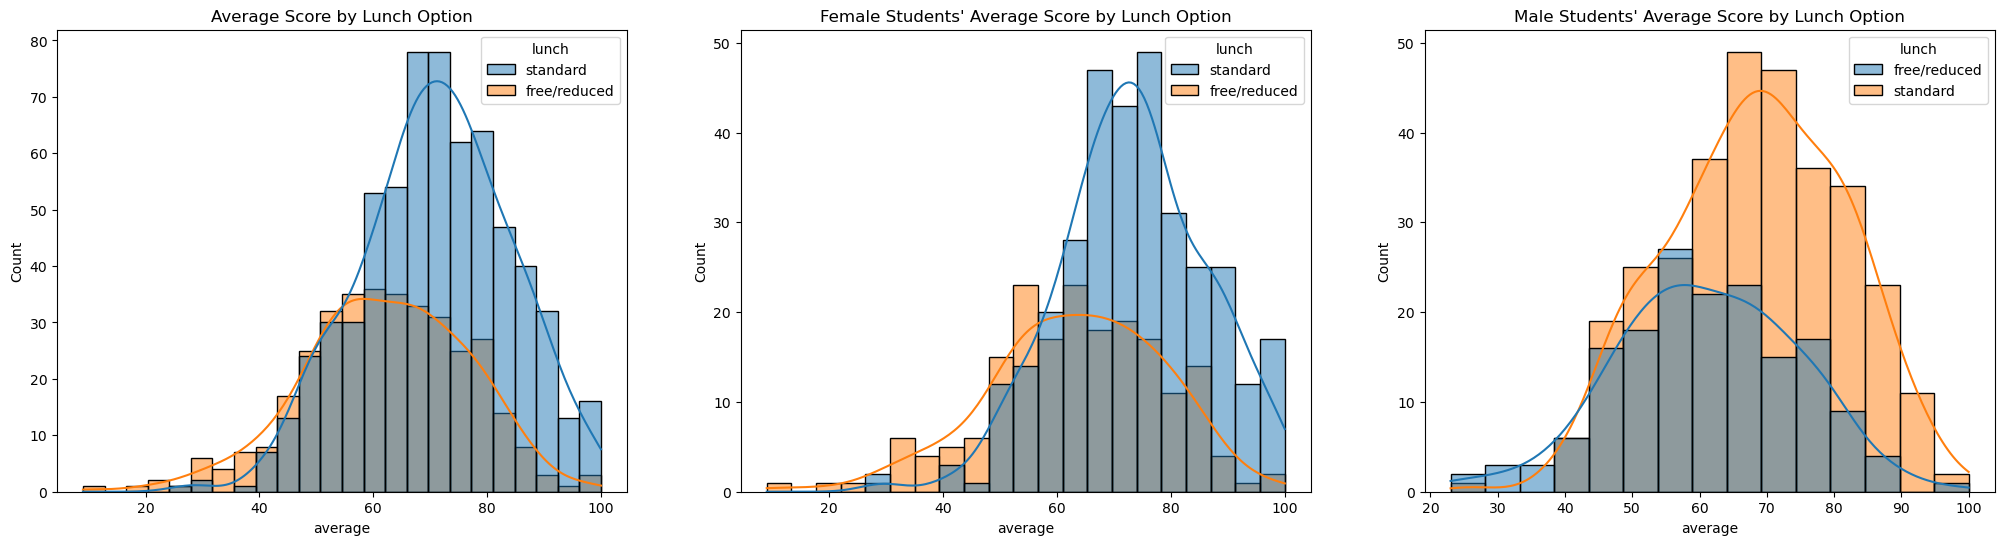

In [18]:
#average score by lunch option and gender
fig, axs = plt.subplots(1, 3, figsize=(25,6))
plt.subplot(1,3,1)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.title("Average Score by Lunch Option")
plt.subplot(1,3,2)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.title("Female Students' Average Score by Lunch Option")
plt.subplot(1,3,3)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.title("Male Students' Average Score by Lunch Option")
plt.show()

**Insights**
* Standard lunch helps students perform better in exams
* The result is the same for female and male students

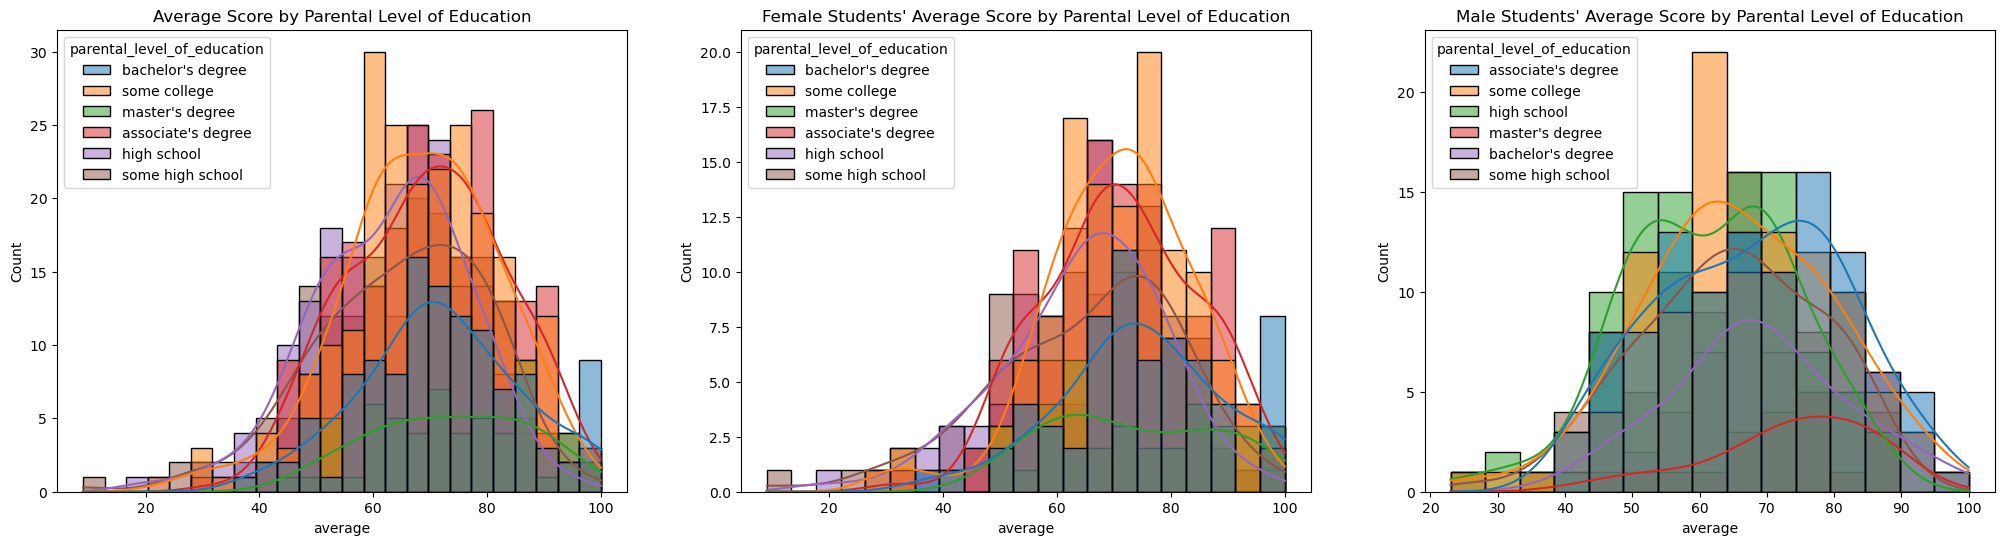

In [19]:
#average score by parental level of education and gender
fig, axs = plt.subplots(1,3,figsize = (25,6))
plt.subplot(1,3,1)
sns.histplot(data = df, x = 'average', kde = True, hue = 'parental_level_of_education')
plt.title("Average Score by Parental Level of Education")
plt.subplot(1,3,2)
sns.histplot(data = df[df['gender'] == 'female'], x = 'average', kde = True, hue = 'parental_level_of_education')
plt.title("Female Students' Average Score by Parental Level of Education")
plt.subplot(1,3,3)
sns.histplot(data=df[df['gender'] == 'male'], x = 'average', kde = True, hue = 'parental_level_of_education')
plt.title("Male Students' Average Score by Parental Level of Education")
plt.show()

**Insights**
* Parents' education do not effect students' performance
* Parents' education do not effect female students' performance
* Male students peform better with parents holding associate's degrees and master's degrees

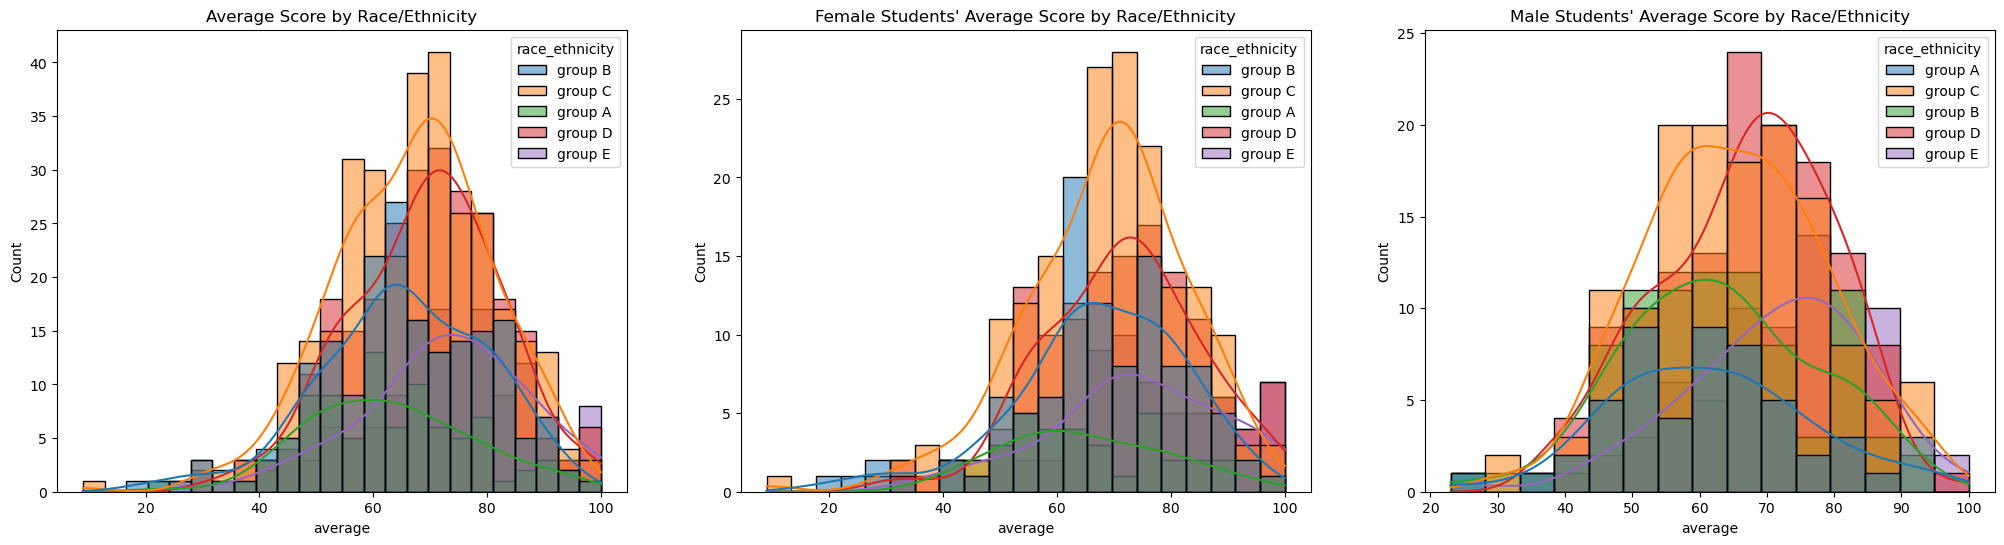

In [20]:
#average score by race/ethnicity and gender
fig, axs = plt.subplots(1,3, figsize = (25,6))
plt.subplot(1,3,1)
sns.histplot(data=df, x= 'average', kde = True, hue = 'race_ethnicity')
plt.title("Average Score by Race/Ethnicity")
plt.subplot(1,3,2)
sns.histplot(data=df[df['gender'] == 'female'], x = 'average', kde = True, hue = 'race_ethnicity')
plt.title("Female Students' Average Score by Race/Ethnicity")
plt.subplot(1,3,3)
sns.histplot(data = df[df['gender'] == 'male'], x = 'average', kde = True, hue = 'race_ethnicity')
plt.title("Male Students' Average Score by Race/Ethnicity")
plt.show()

**Insights**
* Students in Group A and Group B performed worse than the rest
* Female students in Group C, D, E performed better
* Male students in Group D and E performed better

#### 4.2 Students' Maximum Scores in All Three Subjects

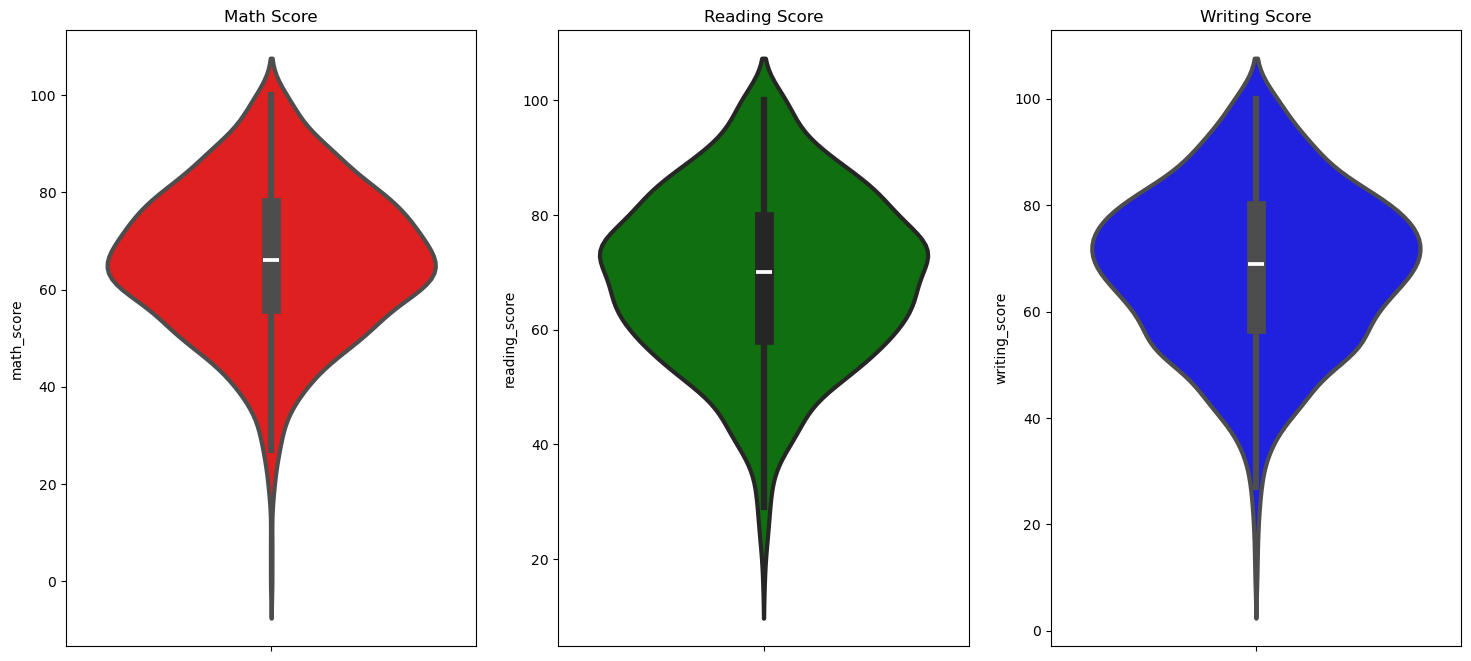

In [21]:
fig, axs = plt.subplots(1,3, figsize = (18,8))
plt.subplot(1,3,1)
sns.violinplot(y = 'math_score', data = df, color = 'red', linewidth = 3)
plt.title('Math Score')
plt.subplot(1,3,2)
sns.violinplot(y = 'reading_score', data = df, color = 'green', linewidth = 3)
plt.title('Reading Score')
plt.subplot(1,3,3)
sns.violinplot(y = 'writing_score', data = df, color = 'blue', linewidth = 3)
plt.title('Writing Score')
plt.show()

**Insights**
* Most students scored around 60-80 in Maths and 50-80 in Reading + Writing

#### 4.3 Multivariate Analysis Using Pieplot

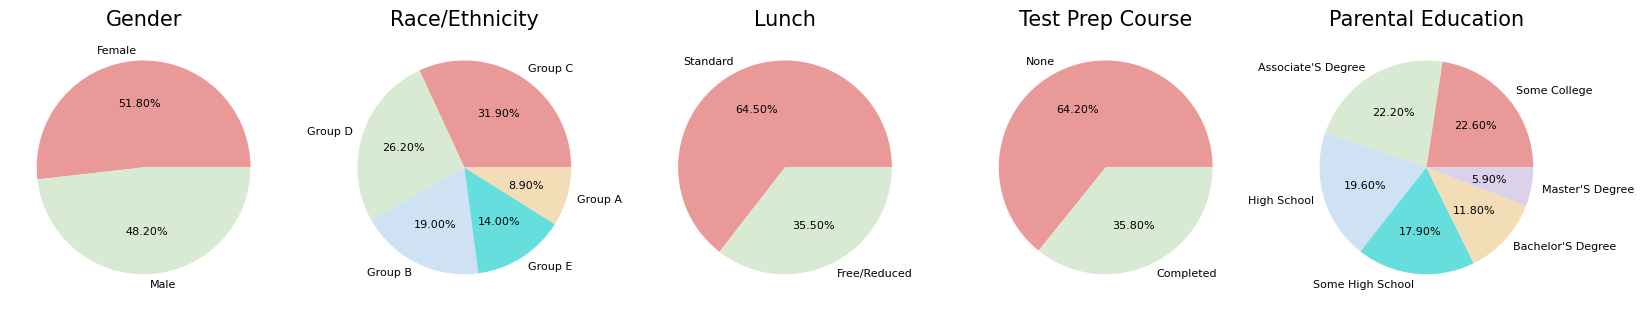

In [22]:
fig, axs = plt.subplots(1,5, figsize = (20,6))

plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = size.index.str.title()
color = ['#ea9999', '#d9ead3']

plt.pie(size, colors = color, labels = labels, autopct = '%2.2f%%', textprops={'fontsize': 8})
plt.title('Gender', fontsize = 15)
plt.axis('off')

plt.subplot(1,5,2)
size = df['race_ethnicity'].value_counts()
labels = size.index.str.title()
color = ['#ea9999', '#d9ead3', '#cfe2f3', '#67dede', '#f3ddb6']

plt.pie(size, colors = color, labels = labels, autopct = '%2.2f%%', textprops={'fontsize': 8})
plt.title('Race/Ethnicity', fontsize = 15)
plt.axis('off')

plt.subplot(1,5,3)
size = df['lunch'].value_counts()
labels = size.index.str.title()
color = ['#ea9999', '#d9ead3']

plt.pie(size, colors = color, labels = labels, autopct = '%2.2f%%', textprops = {'fontsize': 8})
plt.title('Lunch', fontsize = 15)
plt.axis('off')

plt.subplot(1,5,4)
size = df['test_preparation_course'].value_counts()
labels = size.index.str.title()
color = ['#ea9999', '#d9ead3']

plt.pie(size, colors = color, labels = labels, autopct = '%2.2f%%', textprops = {'fontsize': 8})
plt.title('Test Prep Course', fontsize = 15)
plt.axis('off')

plt.subplot(1,5,5)
size = df['parental_level_of_education'].value_counts()
labels = size.index.str.title()
color = ['#ea9999', '#d9ead3', '#cfe2f3', '#67dede', '#f3ddb6', '#d9d2e9']

plt.pie(size, colors = color, labels = labels, autopct = '%2.2f%%', textprops = {'fontsize': 8})
plt.title('Parental Education', fontsize = 15)
plt.axis('off')
plt.show()


**Insights**
* Same amount of female and male students
* Most students belong to racial/ethinic group C
* Most students receive standard lunch
* Majority of students have not completed a test preparation course
* Most students have parents that have completed some colleges or have obtained associate's degrees


#### 4.4 Feature Wise Visualization

#### 4.4.1 Gender Column

* Gender distribution
* Does gender have an impact on students' performance?

**Univariate Analysis (Gender Distribution)**

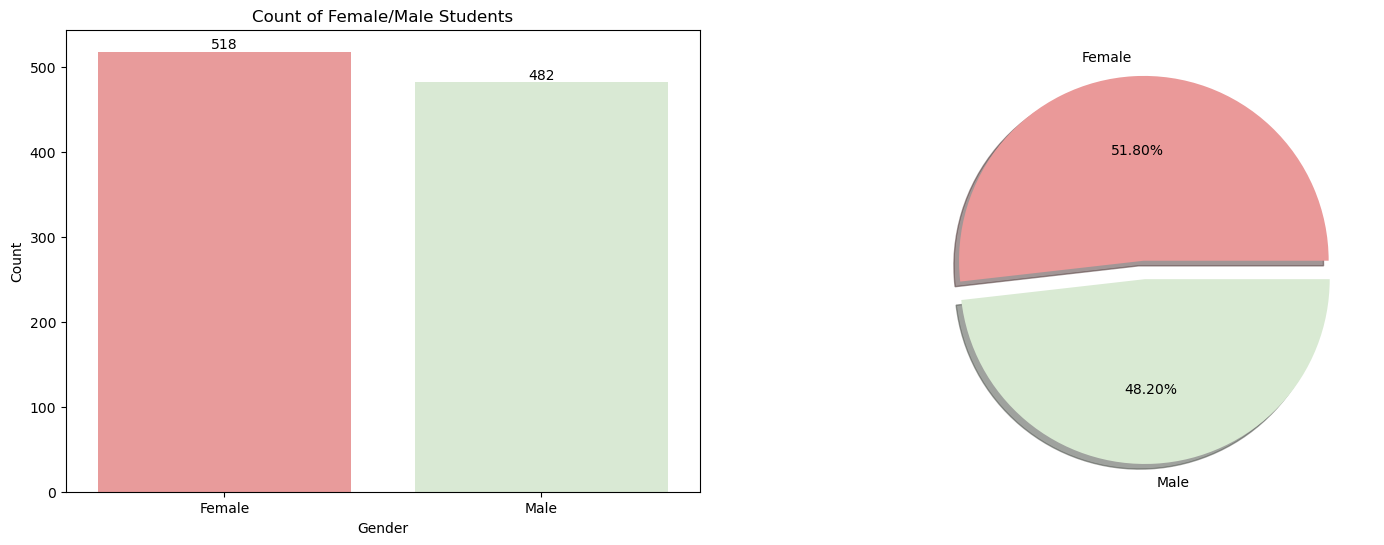

In [23]:
fig, ax=plt.subplots(1,2,figsize=(18,6))
plt.subplot(1,2,1)
size = df['gender'].value_counts()
sns.countplot(x=df['gender'],data=df,palette = ['#ea9999', '#d9ead3'],saturation=0.95, ax=ax[0], order = size.index)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=10)
plt.title("Count of Female/Male Students")
plt.xticks(size.index, labels=size.index.str.title())
plt.xlabel("Gender")
plt.ylabel("Count")

plt.subplot(1,2,2)
size = df['gender'].value_counts()
plt.pie(x=df['gender'].value_counts(),labels=size.index.str.title(),explode=[0,0.1],autopct='%2.2f%%',shadow=True,colors=['#ea9999', '#d9ead3'])

plt.show()

***Insights***
* Gender is balanced with 518 counts of female students (51.80%) and 482 counts of male students (48.20%)

**Bivariate Analysis (Does gender have an impact on students' performance?)**

In [24]:
gender_group = df.groupby('gender').mean(numeric_only = True)
gender_group

,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


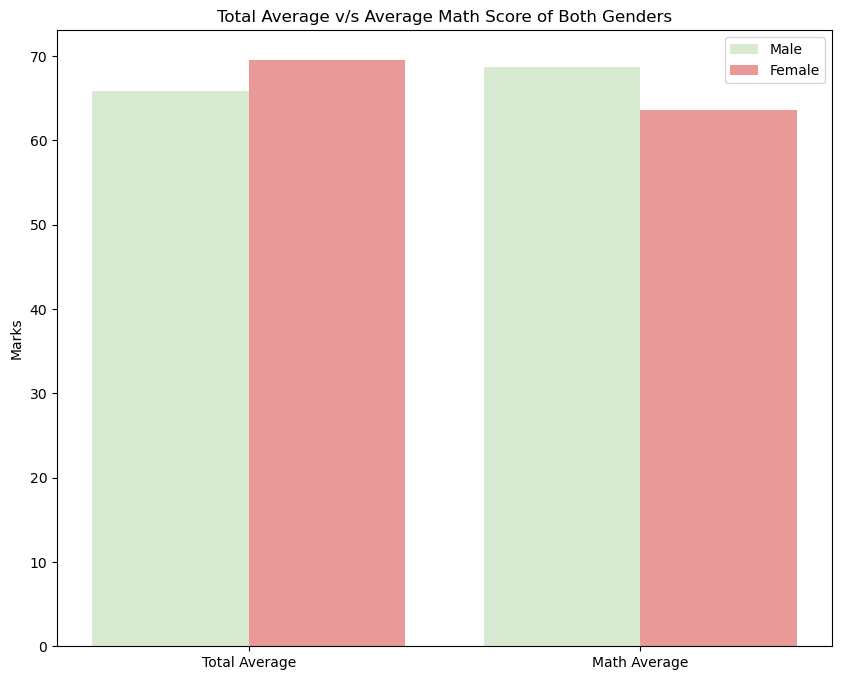

In [25]:
plt.figure(figsize = (10,8))

X = ['Total Average', 'Math Average']

female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male', color = '#d9ead3')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female', color = '#ea9999',)

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total Average v/s Average Math Score of Both Genders")
plt.legend()
plt.show()

***Insights***
* Female students have a higher 'total average' score than male students
* Male students have a higher average score in maths

#### 4.4.2 Race/Ethnicity Columnn

* Race/Ethnicity distribution
* Does race/ethnicity have an impact on student's performance?

**Univariate Analysis (Race/Ethnicity Distribution)**

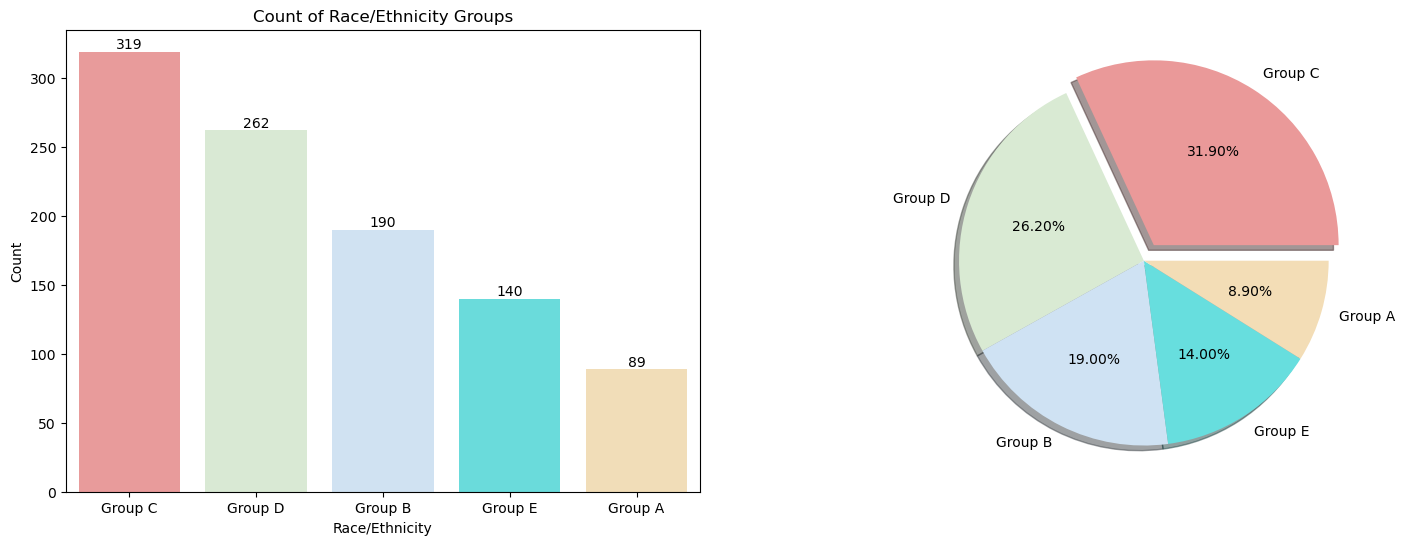

In [26]:
fig, ax = plt.subplots(1,2,figsize = (18,6))
colors = ['#ea9999', '#d9ead3', '#cfe2f3', '#67dede', '#f3ddb6']

plt.subplot(1,2,1)
size = df['race_ethnicity'].value_counts()
sns.countplot(x = df['race_ethnicity'], data = df, palette = colors, saturation = 0.95, ax = ax[0], order = size.index)
for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', size = 10)
plt.title("Count of Race/Ethnicity Groups")
plt.xticks(size.index, labels = size.index.str.title())
plt.xlabel("Race/Ethnicity")
plt.ylabel("Count")

plt.subplot(1,2,2)
size = df['race_ethnicity'].value_counts()
plt.pie(x = df['race_ethnicity'].value_counts(), labels = size.index.str.title(), autopct= '%2.2f%%', shadow = True, colors = colors, explode=[0.1,0,0,0,0])

plt.show()

***Insights***
* Majority of students belong to Group C and Group D
* Group A has the least amount of students

**Bivariate Analysis (Does race/ethnicity have an impact on students' perfromance)**

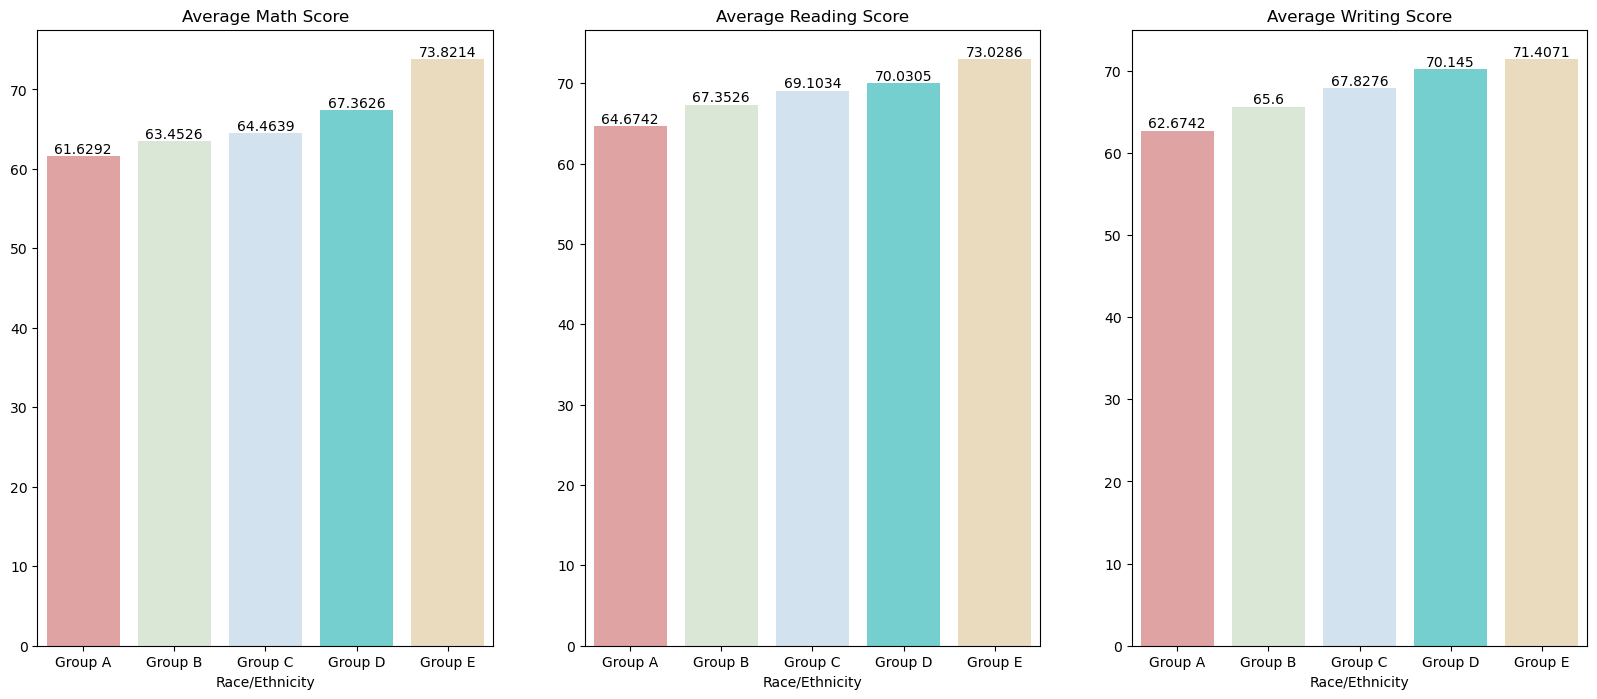

In [27]:
group_data_2 = df.groupby('race_ethnicity').mean(numeric_only=True)
colors = ['#ea9999', '#d9ead3', '#cfe2f3', '#67dede', '#f3ddb6']

fig, ax = plt.subplots(1,3, figsize = (20,8))

sns.barplot(x = group_data_2['math_score'].index, y = group_data_2['math_score'].values, palette = colors, ax = ax[0])
ax[0].set_title('Average Math Score')
ax[0].set_xlabel('Race/Ethnicity')
ax[0].set_xticks(group_data_2['math_score'].index, labels = group_data_2['math_score'].index.str.title())
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=10)

sns.barplot(x = group_data_2['reading_score'].index, y = group_data_2['reading_score'].values, palette = colors, ax = ax[1])
ax[1].set_title('Average Reading Score')
ax[1].set_xlabel('Race/Ethnicity')
ax[1].set_xticks(group_data_2['reading_score'].index, labels = group_data_2['reading_score'].index.str.title())
for container in ax[1].containers:
    ax[1].bar_label(container, color = 'black', size = 10)

sns.barplot(x = group_data_2['writing_score'].index, y = group_data_2['writing_score'].values, palette = colors, ax = ax[2])
ax[2].set_title('Average Writing Score')
ax[2].set_xlabel('Race/Ethnicity')
ax[2].set_xticks(group_data_2['writing_score'].index, labels = group_data_2['writing_score'].index.str.title())
for container in ax[2].containers:
    ax[2].bar_label(container, color = 'black', size = 10)

plt.show()

***Insights***
* Group E students scored the highest marks for all subjects
* Group A students scored the lowest marks for all subjects
* Students from a lower socioeconomic status score lower in all subjects


#### 4.4.3 Parental Level of Education Column

* Parental education background
* Does parental education background have an impact on students' performance?

**Univariate Analysis (Parental Education Background)**

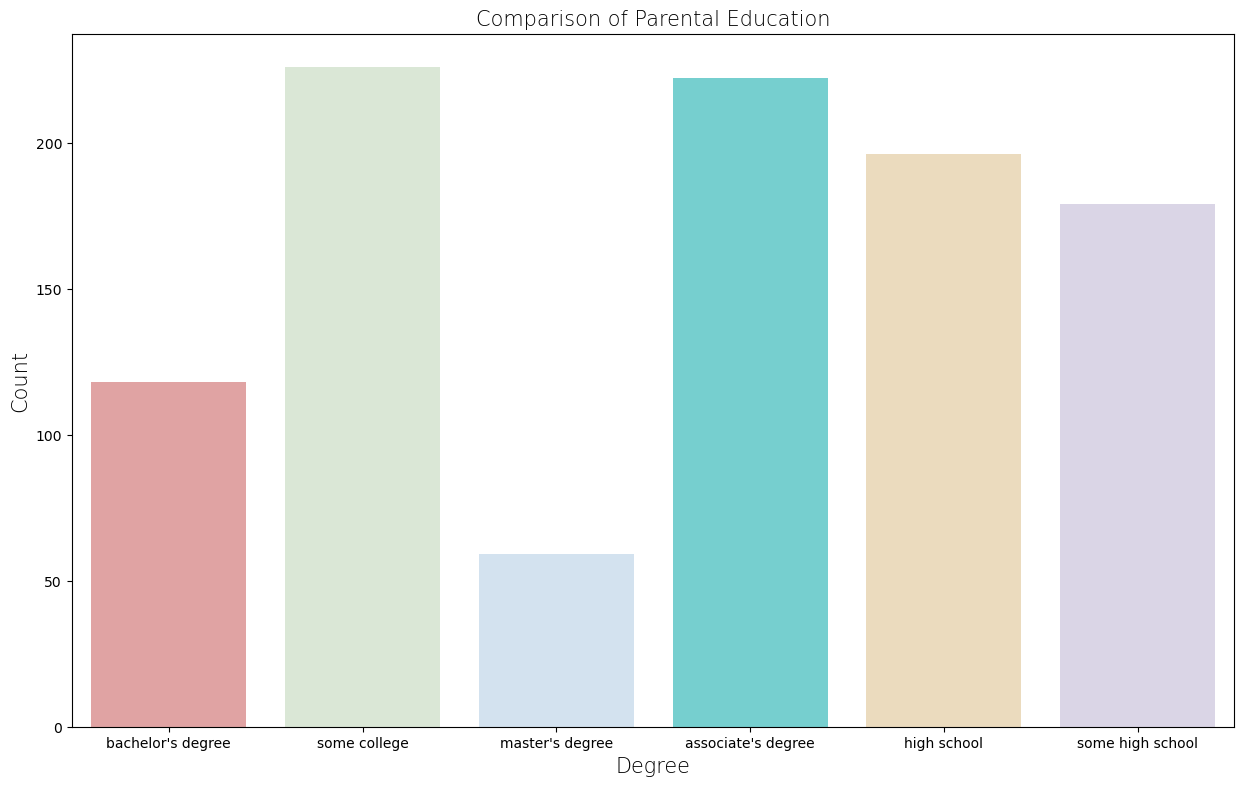

In [28]:
plt.figure(figsize = (15,9))
colors = ['#ea9999', '#d9ead3', '#cfe2f3', '#67dede', '#f3ddb6', '#d9d2e9']

sns.countplot(data = df, x = df['parental_level_of_education'], palette=colors)
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 15)
plt.xlabel('Degree', fontweight = 30, fontsize = 15)
plt.ylabel('Count', fontweight = 30, fontsize = 15)
plt.show()

***Insights***
* Majority of parents have completed some college

**Bivariate Analysis (Does parental education background have an impact on students' performance?)**

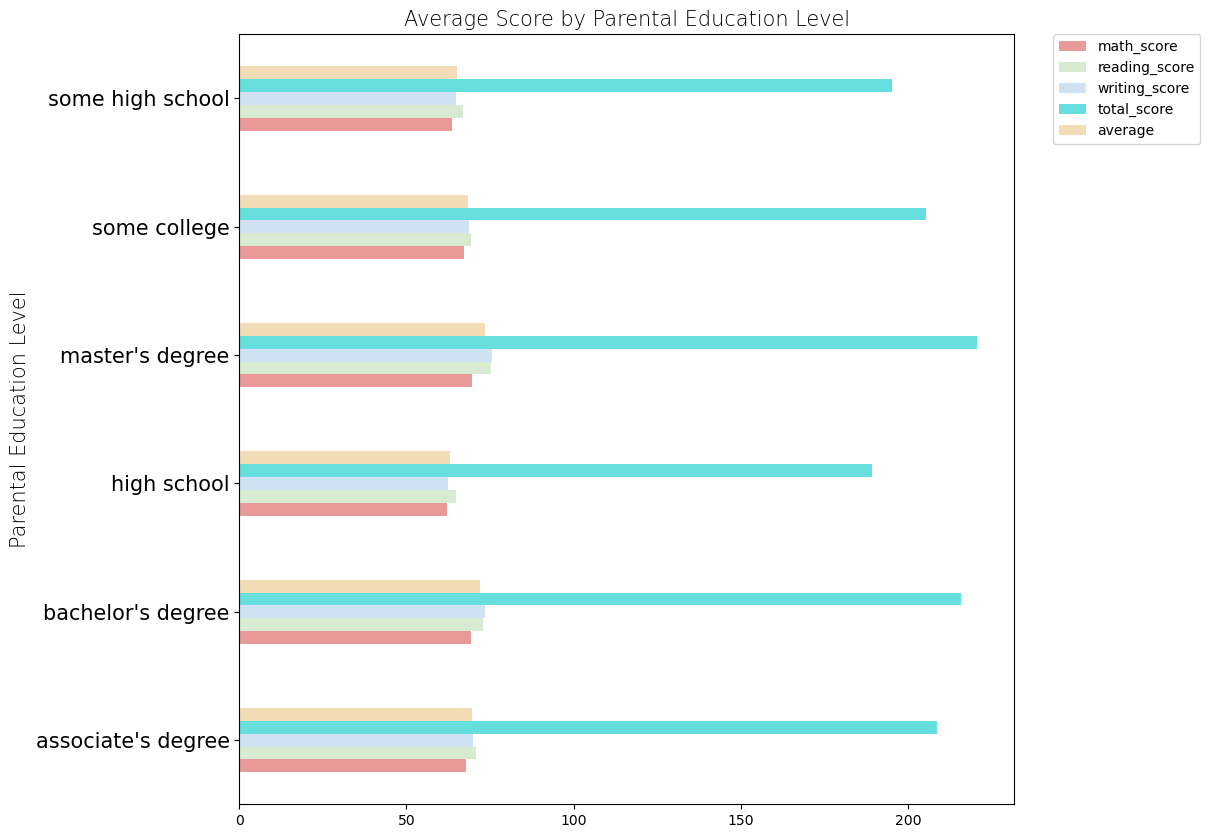

In [29]:
colors = ['#ea9999', '#d9ead3', '#cfe2f3', '#67dede', '#f3ddb6']
parent_education_avg_score = df.groupby('parental_level_of_education').mean(numeric_only = True).plot(kind = 'barh', figsize = (10,10), color = colors)

plt.title('Average Score by Parental Education Level', fontweight = 30, fontsize = 15)
plt.ylabel('Parental Education Level', fontweight = 30, fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

***Insights***
* Students whose parents acquired bachelor's and master's degrees are higher than other groups

#### 4.4.4 Lunch Options

* Most common lunch options among students
* Does lunch option have an impact on students' performance?

**Univariate Analysis (Lunch Options Distribution)**

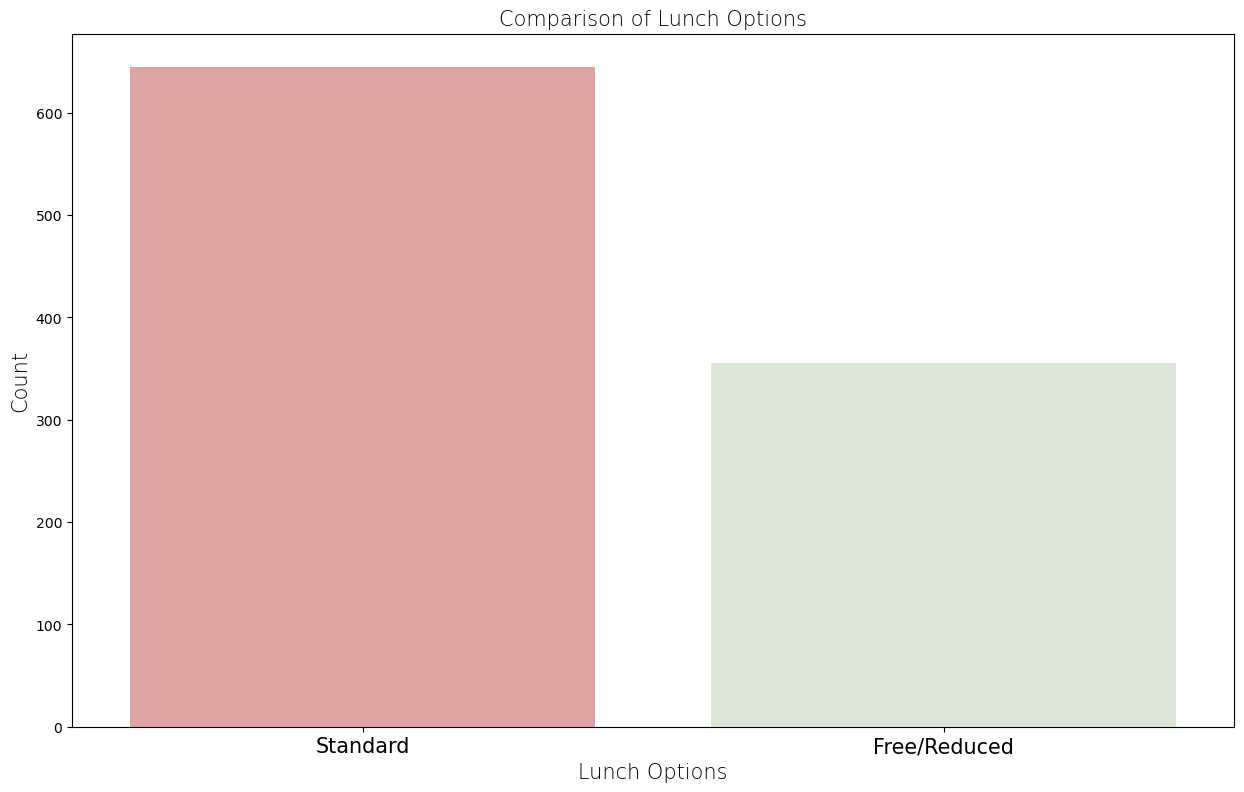

In [30]:
plt.figure(figsize = (15,9))
colors = color = ['#ea9999', '#d9ead3']
size = df['lunch'].value_counts()

sns.countplot(data = df, x = 'lunch', palette = colors)
plt.title('Comparison of Lunch Options', fontweight = 30, fontsize = 15)
plt.xlabel('Lunch Options', fontsize = 15, fontweight = 30)
plt.ylabel('Count', fontweight = 30, fontsize = 15)
plt.xticks(size.index ,labels = size.index.str.title(), fontsize = 15)


plt.show()

***Insights***
* More students got standard than free/reduced lunch

**Bivariate Analysis (Does lunch option have an impact on students' performance?)**

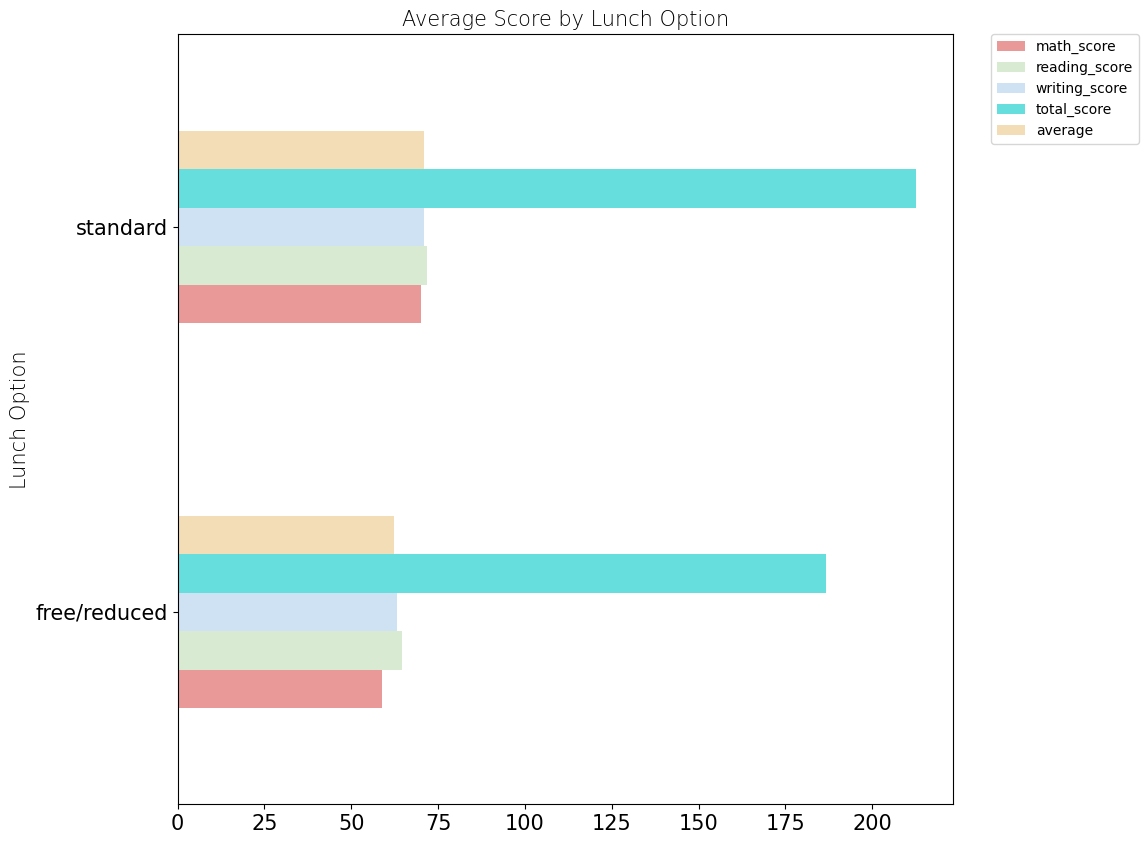

In [31]:
colors = ['#ea9999', '#d9ead3', '#cfe2f3', '#67dede', '#f3ddb6']
lunch_option_score = df.groupby('lunch').mean(numeric_only = True)
lunch_option_score.plot(kind = 'barh', figsize = (10,10), color = colors)

plt.title('Average Score by Lunch Option', fontweight = 30, fontsize = 15)
plt.ylabel('Lunch Option', fontweight = 30, fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

***Insights***
* Students receiving standard lunch performed better than students receiving free/reduced lunch

#### 4.4.5 Test Preparation Course

* Test preparation course distribution
* Does test preparation impact students' performance?

**Univariate Analysis (Test Preparation Course Distribution)**

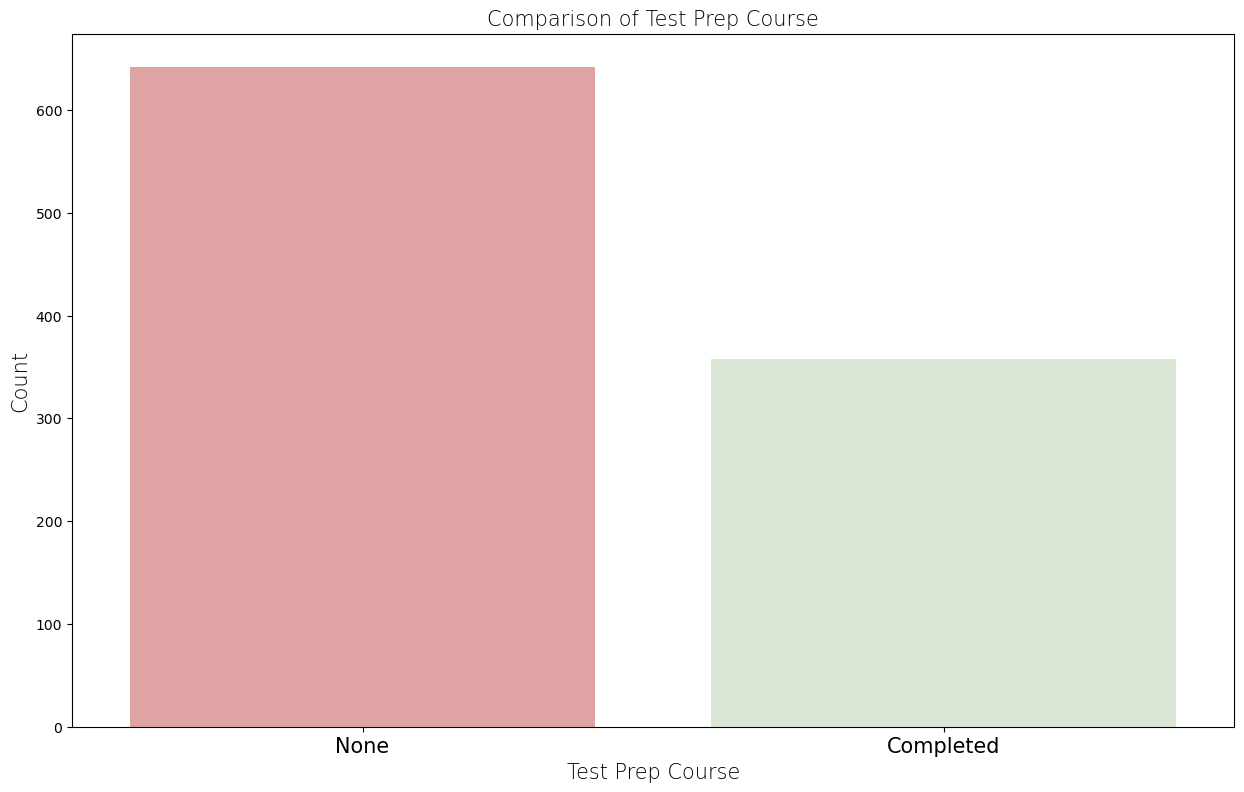

In [32]:
plt.figure(figsize = (15,9))
colors = color = ['#ea9999', '#d9ead3']
size = df['test_preparation_course'].value_counts()

sns.countplot(data = df, x = 'test_preparation_course', palette = colors)
plt.title('Comparison of Test Prep Course', fontweight = 30, fontsize = 15)
plt.xlabel('Test Prep Course', fontsize = 15, fontweight = 30)
plt.ylabel('Count', fontweight = 30, fontsize = 15)
plt.xticks(size.index ,labels = size.index.str.title(), fontsize = 15)


plt.show()

**Bivariate Analysis (Does test preparation impact students' performance?)**

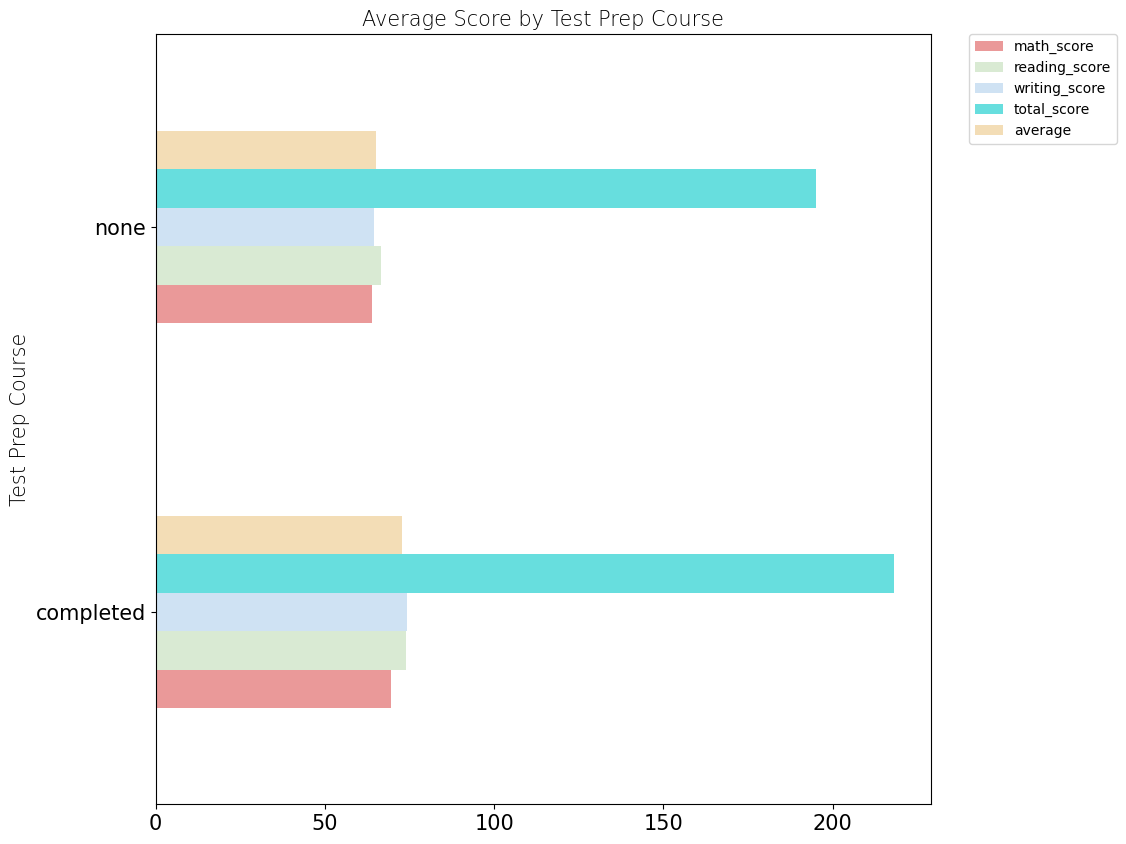

In [33]:
colors = ['#ea9999', '#d9ead3', '#cfe2f3', '#67dede', '#f3ddb6']
test_prep_score = df.groupby('test_preparation_course').mean(numeric_only = True)
test_prep_score.plot(kind = 'barh', figsize = (10,10), color = colors)

plt.title('Average Score by Test Prep Course', fontweight = 30, fontsize = 15)
plt.ylabel('Test Prep Course', fontweight = 30, fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

***Insights***
* Students who have completed the Test Preparation Course scored higher in all three categories

#### 4.4.6 Checking Outliers

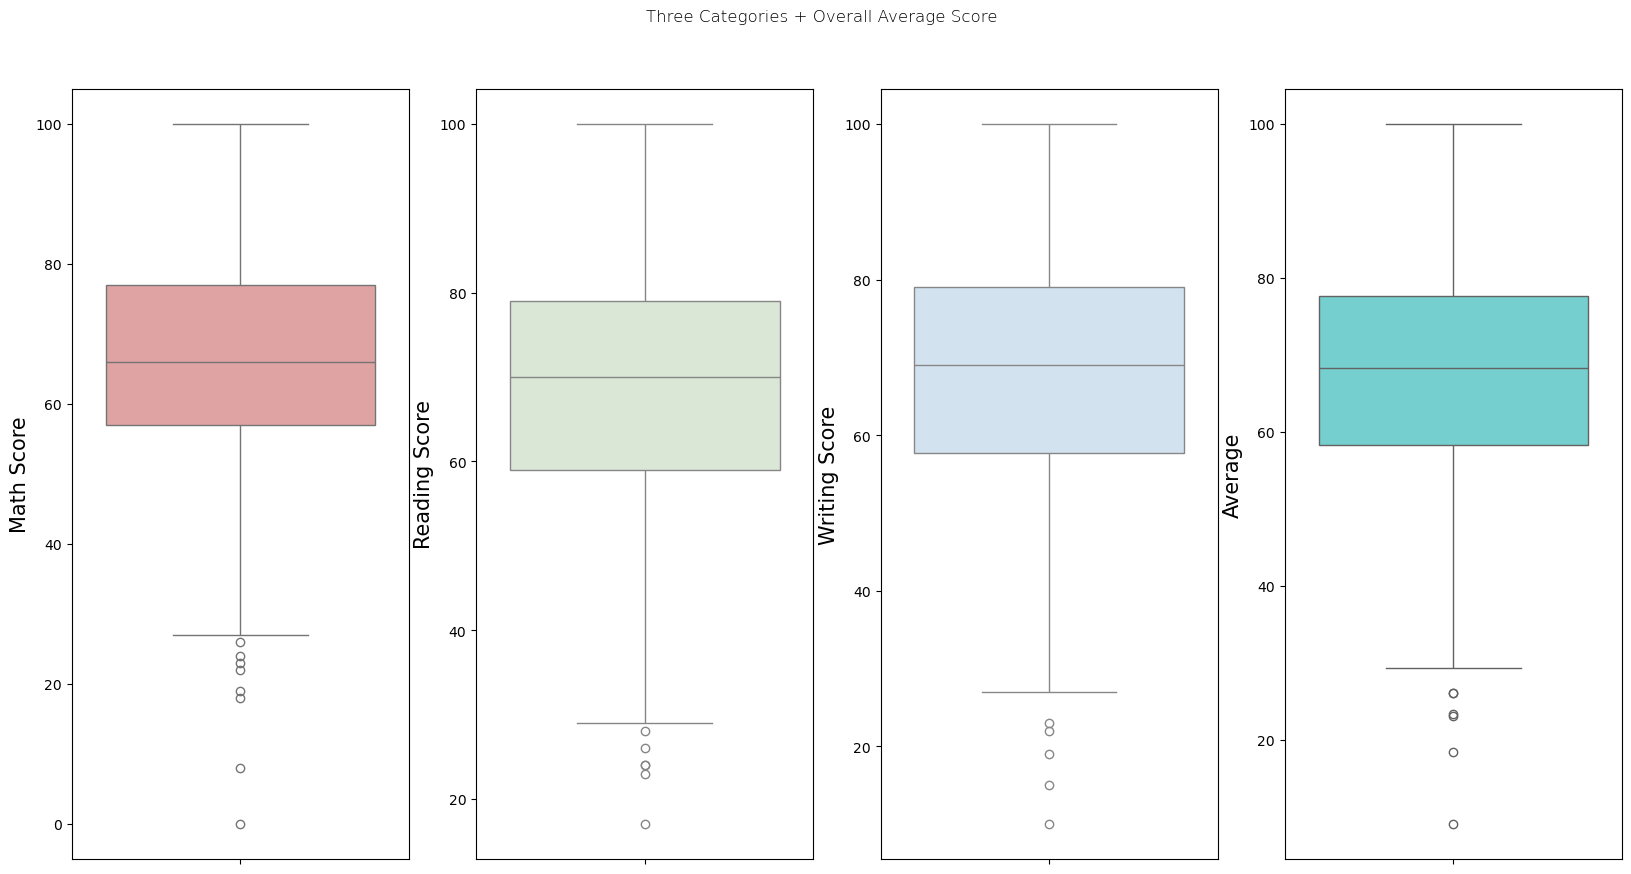

In [34]:
fig, axs = plt.subplots(1, 4, figsize = (20,10))

plt.subplot(1,4,1)
sns.boxplot(df['math_score'], color = '#ea9999')
plt.ylabel('Math Score', fontsize = 15)

plt.subplot(1,4,2)
sns.boxplot(df['reading_score'], color = '#d9ead3')
plt.ylabel('Reading Score', fontsize = 15)

plt.subplot(1,4,3)
sns.boxplot(df['writing_score'], color = '#cfe2f3')
plt.ylabel('Writing Score', fontsize = 15)

plt.subplot(1,4,4)
sns.boxplot(df['average'], color = '#67dede')
plt.ylabel('Average', fontsize = 15)

fig.suptitle('Three Categories + Overall Average Score', fontweight = 50, y = 0.96)
plt.show()

#### 4.4.7 Multivariate Analysis Using Pairplot

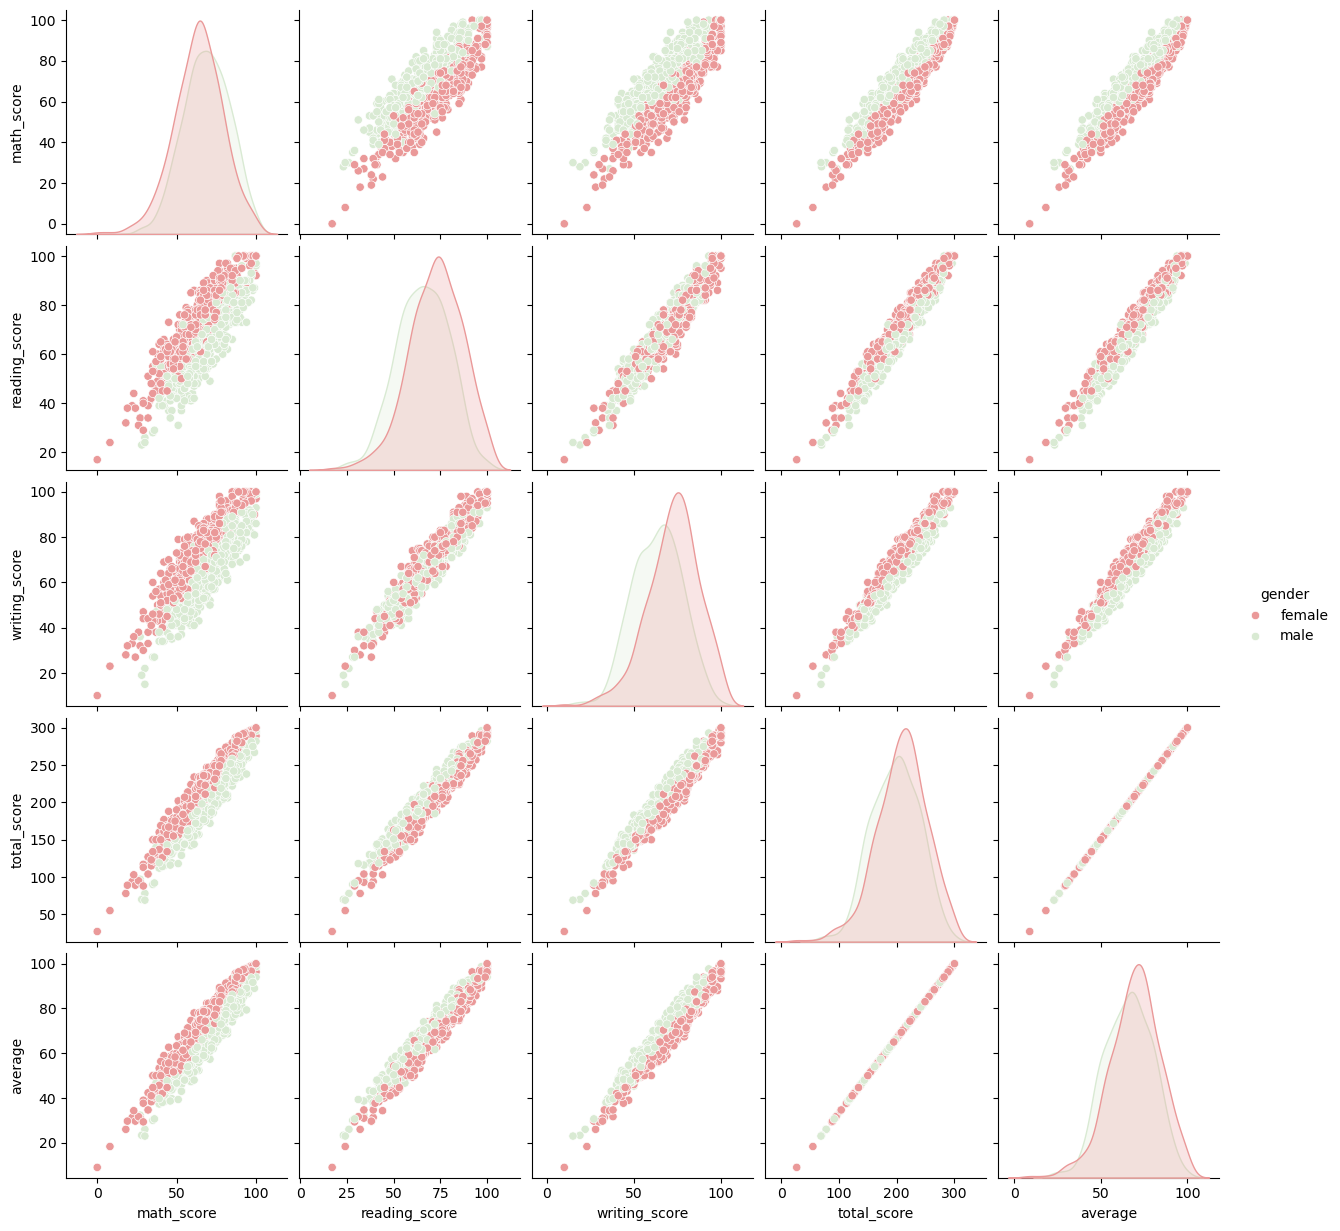

In [35]:
sns.pairplot(df, hue = 'gender', palette=['#ea9999', '#d9ead3'])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

***Insights***
* All scores increase linearly with each other

#### 5. Conclusions

* Students' performance is related with lunch, race, and parental education level
* Female students performed better than male students
* Students' performance are not related with test preparation course
* However, completing test preparation course is more beneficial